In [1]:
import librosa
import ffmpeg

In [3]:
audio_path = 'C:/Users/bodda/Documents/Deep Learning Projects/Music Genre Classification/genres/genres/blues/blues.00000.au.wav'
x , sr = librosa.load(audio_path)

In [3]:
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [4]:
print(x.shape, sr)

(661794,) 22050


In [5]:
librosa.load(audio_path, sr=44100)

(array([ 0.00735559,  0.01335777,  0.01657013, ..., -0.07286715,
        -0.0628456 , -0.03154328], dtype=float32), 44100)

In [6]:
import IPython.display as ipd
ipd.Audio(audio_path)

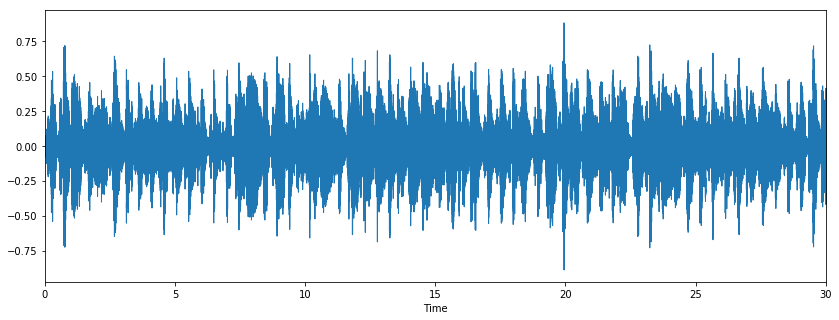

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

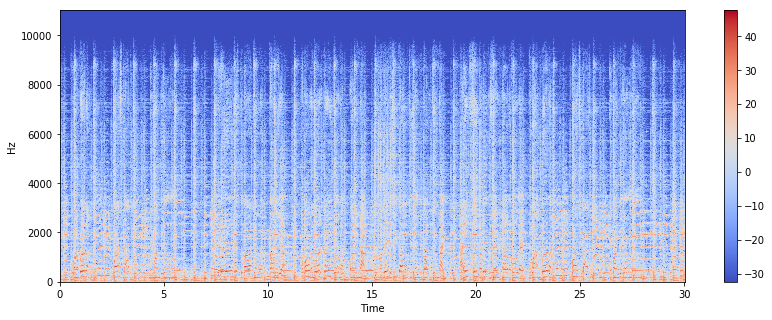

In [8]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

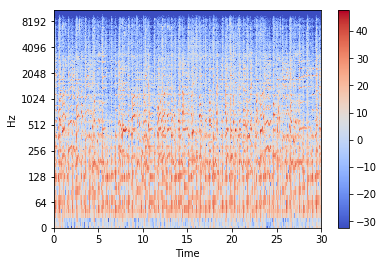

In [9]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [5]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
#from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


In [6]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [7]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

In [ ]:
for g in genres:
    pathlib.Path('images/'+g+'').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir('./genres/genres/'+g+''):
        if filename.endswith('wav'):
            songname = './genres/genres/'+g+'/'+filename+''
            y, sr = librosa.load(songname, mono=True, duration=5)
            plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
            plt.axis('off');
            plt.savefig('images/'+g+'/'+filename[:-3].replace(".", "")+'.png')
            plt.clf()

In [15]:
i = 0
for g in genres:
    for file in os.listdir('./genres/genres/'+g+''):
        if file.endswith('wav'):
            i = i+1

print(i)

1000


In [16]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += ' mfcc'+str(i)+''
header += ' label'
header = header.split()
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


In [17]:
file = open('alldata2.csv', 'w', newline='')

In [18]:
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [19]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

In [20]:
for g in genres:
    for filename in os.listdir('./genres/genres/'+g+''):
        if filename.endswith('wav'):
            songname = './genres/genres/'+g+'/'+filename
            y, sr = librosa.load(songname, mono=True, duration=30)
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rmse = librosa.feature.rmse(y=y)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr) 
            to_append = filename+' '+str(np.mean(chroma_stft))+' '+str(np.mean(rmse))+' '+ str(np.mean(spec_cent))+' '+ str(np.mean(spec_bw))+' '+ str(np.mean(rolloff))+ ' ' + str(np.mean(zcr))    
            for e in mfcc:
                to_append += ' '+str(np.mean(e))
            to_append += ' '+g
            file = open('alldata2.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())

In [21]:
data = pd.read_csv('alldata2.csv')
data.head()

filename  chroma_stft      rmse  spectral_centroid  \
0  blues.00000.au.wav     0.349943  0.130225        1784.420446   
1  blues.00001.au.wav     0.340983  0.095918        1529.835316   
2  blues.00002.au.wav     0.363603  0.175573        1552.481958   
3  blues.00003.au.wav     0.404779  0.141191        1070.119953   
4  blues.00004.au.wav     0.308590  0.091563        1835.494603   

   spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0         2002.650192  3806.485316            0.083066 -113.596742   
1         2038.617579  3548.820207            0.056044 -207.556796   
2         1747.165985  3040.514948            0.076301  -90.754394   
3         1596.333948  2185.028454            0.033309 -199.431144   
4         1748.362448  3580.945013            0.101500 -160.266031   

        mfcc2      mfcc3  ...      mfcc12    mfcc13    mfcc14    mfcc15  \
0  121.557302 -19.158825  ...    8.810668 -3.667367  5.751690 -5.162761   
1  124.006717   8.930562  ...    5.376802 -2.239119  4.216963 -6.012273   
2  140.459907 -29.109965  ...    5.789265 -8.905224 -1.083720 -9.218359   
3  150.099218   5.647594  ...    6.087676 -2.476420 -1.073890 -2.874777   
4  126.198800 -35.605448  ...   -2.806385 -6.934122 -7.558619 -9.173552   

     mfcc16    mfcc17    mfcc18    mfcc19     mfcc20  label  
0  0.750947 -1.691937 -0.409954 -2.300208   1.219928  blues  
1  0.936109 -0.716537  0.293875 -0.287431   0.531573  blues  
2  2.455805 -7.726901 -1.815724 -3.433434  -2.226821  blues  
3  0.780976 -3.316932  0.637981 -0.619690  -3.408233  blues  
4 -4.512166 -5.453538 -0.924162 -4.409333 -11.703781  blues  

[5 rows x 28 columns]

In [ ]:
data.tail()

In [ ]:
data.shape

In [3]:
data = data.drop(['filename'],axis=1)

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
onehot=OneHotEncoder()

In [54]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [12]:
y = data.iloc[:, -1]

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [57]:
from keras.utils import to_categorical
y_binary = to_categorical(y)

IndexError: index -17 is out of bounds for axis 1 with size 16

In [18]:
y_binary 

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
y_reshape

In [ ]:
y_onehot = onehot.transform(y_reshape)

In [ ]:
y_onehot

In [ ]:
y_onehot = y_onehot.toarray()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.4,random_state=2)

In [44]:
X

array([[-5.28017139e+00+0.0000000e+00j, -3.70380926e+00+0.0000000e+00j,
        -2.53658724e+00+0.0000000e+00j, ...,
         3.10940504e+00+0.0000000e+00j, -4.33118105e-01+0.0000000e+00j,
        -1.74286175e+01+0.0000000e+00j],
       [ 4.27672338e+00+5.8872178e-17j,  8.50443125e-01+1.6163833e+00j,
         1.28570247e+00-2.8567898e-01j, ...,
        -2.20653963e+00+2.1858121e-01j, -3.14449644e+00-3.2049682e+00j,
         1.12701941e+01-1.3743819e+01j],
       [-3.94051814e+00-1.4770683e-17j,  1.57026231e+00+4.1647038e-01j,
        -1.75258324e-01+7.0544934e-01j, ...,
        -5.07911384e-01-1.4191605e+00j, -6.45651579e-01-1.5557450e+00j,
         2.28059745e+00+1.6550421e+01j],
       ...,
       [-8.06762557e-03+4.3623413e-18j,  3.98801966e-03-1.9650784e-04j,
        -1.77181300e-05+2.0720602e-04j, ...,
         2.41400747e-04-1.1797844e-04j, -6.74371433e-04+1.6490875e-03j,
         2.47839396e-03-1.0946114e-02j],
       [ 7.85761513e-03-8.5651972e-18j, -9.43385112e-06-3.9045541e-0

In [ ]:
X_train

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

In [20]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout

In [21]:
from keras import models
from keras import layers
from keras import regularizers
from keras.layers.core import Dropout

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
from sklearn.model_selection import StratifiedKFold

In [69]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
600/600 [==============================] - 0s 575us/step - loss: 2.6375 - acc: 0.2550
Epoch 2/20
600/600 [==============================] - 0s 43us/step - loss: 2.3415 - acc: 0.3467
Epoch 3/20
600/600 [==============================] - 0s 52us/step - loss: 2.1156 - acc: 0.4100
Epoch 4/20
600/600 [==============================] - 0s 43us/step - loss: 1.9348 - acc: 0.4433
Epoch 5/20
600/600 [==============================] - 0s 48us/step - loss: 1.7772 - acc: 0.5167
Epoch 6/20
600/600 [==============================] - 0s 38us/step - loss: 1.6466 - acc: 0.5817
Epoch 7/20
600/600 [==============================] - 0s 55us/step - loss: 1.5478 - acc: 0.6317
Epoch 8/20
600/600 [==============================] - 0s 42us/step - loss: 1.4544 - acc: 0.6600
Epoch 9/20
600/600 [==============================] - 0s 37us/step - loss: 1.3810 - acc: 0.6667
Epoch 10/20
600/600 [==============================] - 0s 42us/step - loss: 1.3112 - acc: 0.6883
Epoch 11/20
600/600 [=================

In [24]:
test_loss, test_acc = model.evaluate(X_test,y_test)

400/400 [==============================] - 0s 155us/step


In [25]:
test_acc

0.6325

In [26]:
pred = model.predict(X_test)
pred

array([[9.3372780e-01, 1.1671223e-03, 4.2761896e-02, ..., 1.4284093e-04,
        1.0224174e-02, 3.1443634e-03],
       [2.5544445e-05, 1.7077371e-04, 1.6850960e-02, ..., 8.4387451e-01,
        1.1120054e-02, 8.8370303e-03],
       [1.3374746e-01, 3.3573983e-03, 2.1041644e-01, ..., 1.5678341e-02,
        1.6291289e-01, 2.1027151e-01],
       ...,
       [1.3232557e-01, 7.1552023e-04, 1.2640695e-01, ..., 4.1761668e-03,
        4.4300801e-01, 3.3753175e-02],
       [4.8923888e-05, 3.3983204e-04, 9.9853957e-03, ..., 7.4578777e-02,
        2.2619104e-02, 2.6052451e-02],
       [1.3352145e-01, 5.5880757e-04, 1.6526008e-02, ..., 3.1220899e-03,
        7.5137503e-02, 1.1935112e-01]], dtype=float32)

In [28]:
np.argmax(pred[1])

7

In [ ]:
from keras import models
from keras import layers

model2 = models.Sequential()
model2.add(layers.Dense(256, activation='relu', input_shape=(X_train2.shape[1],)))

model2.add(layers.Dense(128, activation='relu'))

model2.add(layers.Dense(64, activation='relu'))

model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train2,
                    y_train2,
                    epochs=20,
                    batch_size=128)

In [ ]:
test_loss, test_acc = model2.evaluate(X_test2,y_test2)

In [ ]:
test_acc

In [ ]:
pred = model2.predict(X_test2)

In [ ]:
pred

In [ ]:
np.argmax(pred[10])

In [ ]:
data.head()

In [175]:
mfcc_data = data.iloc[:,7:27]

In [176]:
y = mfcc_data.iloc[:, -1]
encoder = LabelEncoder()
mfcc_y = encoder.fit_transform(genre_list)

In [177]:
from keras.utils import to_categorical
mfcc_y = to_categorical(mfcc_y)

In [178]:
mfcc_y


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [179]:
scaler = StandardScaler()
mfcc_X = scaler.fit_transform(np.array(mfcc_data.iloc[:, :-1], dtype = float))

In [180]:
mfcc_X_train, mfcc_X_test, mfcc_y_train, mfcc_y_test = train_test_split(mfcc_X, mfcc_y, test_size=0.4)

In [181]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM, Activation, Dense, Dropout, Input

In [194]:
mfcc_model = Sequential()
    
mfcc_model.add(LSTM(100,input_shape = (1,19)))
mfcc_model.add(Dense(10,activation='softmax'))

In [202]:
mfcc_model2 = Sequential()
    
mfcc_model2.add(LSTM(64,input_shape = (1,19)))
mfcc_model2.add(Dense(256))
mfcc_model2.add(Dropout(0.25))
mfcc_model2.add(Dense(10,activation='softmax'))

In [161]:
mfcc_X_train.shape[1]

1

In [195]:
mfcc_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [203]:
mfcc_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [184]:
mfcc_X_train

array([[ 0.11149861, -0.65672373,  0.15084747, ...,  0.66163463,
        -0.76456745,  0.92994303],
       [ 0.5302564 ,  0.40074299, -0.84881733, ..., -2.09263335,
         0.72470833, -0.36535114],
       [-0.79802417,  0.24764403,  0.33915517, ...,  1.87425033,
         0.18498274,  0.18360739],
       ...,
       [ 0.38866307, -0.73026683, -0.73116518, ...,  0.44386674,
         0.89429936, -0.34020289],
       [-0.26371534,  0.26117971,  0.33079112, ..., -0.01549001,
         0.07282511, -0.38112766],
       [ 0.50824322, -0.30851944, -2.16646639, ..., -0.32608839,
         0.96498493, -2.27488496]])

In [185]:
mfcc_X_test

array([[-2.57259073,  1.73989324, -0.29041852, ...,  1.9791063 ,
        -0.32394048,  0.58398981],
       [ 0.91842366,  0.00436116, -1.77358549, ..., -1.13881228,
         0.27874187, -0.47719446],
       [ 0.62671831, -0.55022237,  2.8816194 , ...,  0.76435817,
        -0.32070562, -0.38390415],
       ...,
       [ 1.23474217, -1.10631091,  0.72371221, ...,  0.25510176,
         0.63844888,  0.13154242],
       [ 0.47409618, -1.52525635,  1.2756382 , ...,  0.38166928,
        -0.8142803 , -0.11004408],
       [-1.66750851,  1.56886934, -1.1325854 , ...,  0.85257538,
         0.25974143,  0.72362188]])

In [ ]:
# shape of data should be : (num_obs, feature_dimension, sequence_length)
#train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))

In [186]:
import numpy as np
mfcc_X_train = np.reshape(mfcc_X_train, (mfcc_X_train.shape[0], 1, mfcc_X_train.shape[1]))
mfcc_X_test = np.reshape(mfcc_X_test, (mfcc_X_test.shape[0], 1, mfcc_X_test.shape[1]))

In [196]:
mfcc_history = mfcc_model.fit(mfcc_X_train,
                    mfcc_y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 2.2958 - acc: 0.1367
Epoch 2/100
600/600 [==============================] - 0s 53us/step - loss: 2.2474 - acc: 0.2067
Epoch 3/100
600/600 [==============================] - 0s 52us/step - loss: 2.1993 - acc: 0.2733
Epoch 4/100
600/600 [==============================] - 0s 47us/step - loss: 2.1545 - acc: 0.2817
Epoch 5/100
600/600 [==============================] - 0s 45us/step - loss: 2.1114 - acc: 0.2867
Epoch 6/100
600/600 [==============================] - 0s 78us/step - loss: 2.0699 - acc: 0.3033
Epoch 7/100
600/600 [==============================] - 0s 70us/step - loss: 2.0323 - acc: 0.3317
Epoch 8/100
600/600 [==============================] - 0s 52us/step - loss: 1.9949 - acc: 0.3383
Epoch 9/100
600/600 [==============================] - 0s 50us/step - loss: 1.9590 - acc: 0.3533
Epoch 10/100
600/600 [==============================] - 0s 48us/step - loss: 1.9264 - acc: 0.3633
Epoch 11/100
600/600 [========

In [197]:
predictions=mfcc_model.predict(mfcc_X_test)

In [198]:
from sklearn.metrics import roc_auc_score

In [199]:
roc_auc_score(mfcc_y_test,predictions)

0.9232826427453101

In [200]:
mfcc_test_loss, mfcc_test_acc = mfcc_model.evaluate(mfcc_X_test,mfcc_y_test)

400/400 [==============================] - 1s 2ms/step


In [201]:
mfcc_test_acc

0.6375

In [209]:
mfcc_model2.fit(mfcc_X_train,
                    mfcc_y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
600/600 [==============================] - 0s 81us/step - loss: 0.0910 - acc: 0.9933
Epoch 2/100
600/600 [==============================] - 0s 62us/step - loss: 0.0831 - acc: 0.9950
Epoch 3/100
600/600 [==============================] - 0s 96us/step - loss: 0.0848 - acc: 0.9917
Epoch 4/100
600/600 [==============================] - 0s 63us/step - loss: 0.0862 - acc: 0.9933
Epoch 5/100
600/600 [==============================] - 0s 60us/step - loss: 0.0897 - acc: 0.9850
Epoch 6/100
600/600 [==============================] - 0s 58us/step - loss: 0.0861 - acc: 0.9900
Epoch 7/100
600/600 [==============================] - 0s 73us/step - loss: 0.0816 - acc: 0.9917
Epoch 8/100
600/600 [==============================] - 0s 62us/step - loss: 0.0788 - acc: 0.9950
Epoch 9/100
600/600 [==============================] - 0s 83us/step - loss: 0.0801 - acc: 0.9933
Epoch 10/100
600/600 [==============================] - 0s 71us/step - loss: 0.0767 - acc: 0.9917
Epoch 11/100
600/600 [=======

In [210]:
mfcc_test_loss, mfcc_test_acc = mfcc_model2.evaluate(mfcc_X_test,mfcc_y_test)

400/400 [==============================] - 0s 62us/step


In [211]:
mfcc_test_acc

0.6325

In [ ]:
mfcc_test_acc

In [22]:
header = 'filename image label'
header = header.split()
print(header)

['filename', 'image', 'label']


In [23]:
file = open('images.csv', 'w', newline='')

In [24]:
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [25]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()

In [26]:
import cv2
from keras.preprocessing.image import img_to_array
from random import shuffle

In [27]:
#using spectogram images

for g in genres:
    for filename in os.listdir('./images/'+g+''):
        if filename.endswith('png'):
            imgname = './images/'+g+'/'+filename
            to_append = imgname+' '
            img = cv2.imread(imgname)
            img = cv2.resize(img, (28, 28))
            img = img_to_array(img)
           # img = np.array(img).astype('float32')
            to_append += str(img) + ' '+g
            file = open('images.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())

In [28]:
img_data = pd.read_csv('images.csv')
img_data.head()

filename  \
./images/blues/blues00000au.png [[[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] ... [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255.     255.0   
./images/blues/blues00001au.png [[[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] ... [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255.     255.0   
./images/blues/blues00002au.png [[[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] ... [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255.     255.0   
./images/blues/blues00003au.png [[[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] ... [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255.     255.0   
./images/blues/blues00004au.png [[[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] ... [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.]] [[255. 255.0 255.] [255. 255.0 255.] [255. 255.0 255.] ... [255. 255.0 255.] [255. 255.0 255.] [255.     255.0   

                                                                                                                                                                                                                                                                                                                                                                                              

In [505]:
images_data=[]
for g in genres:
    for filename in os.listdir('./images/'+g+''):
        imgname = './images/'+g+'/'+filename
        img = cv2.imread(imgname,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(28,28))
        img = img_to_array(img)
        images_data.append([np.array(img),g])
        shuffle(images_data)


In [487]:
df = pd.DataFrame(images_data)

In [356]:
df.head()

0       1
0  [[[255.0], [255.0], [255.0], [255.0], [255.0],...   disco
1  [[[255.0], [255.0], [255.0], [255.0], [255.0],...  hiphop
2  [[[255.0], [255.0], [255.0], [255.0], [255.0],...    rock
3  [[[255.0], [255.0], [255.0], [255.0], [255.0],...     pop
4  [[[255.0], [255.0], [255.0], [255.0], [255.0],...    rock

In [359]:
df[1]

0          disco
1         hiphop
2           rock
3            pop
4           rock
5         reggae
6          metal
7            pop
8          metal
9          metal
10          rock
11         metal
12           pop
13          jazz
14           pop
15           pop
16       country
17     classical
18       country
19        reggae
20       country
21     classical
22           pop
23         disco
24        reggae
25          rock
26        hiphop
27           pop
28           pop
29     classical
         ...    
970         rock
971          pop
972         rock
973       hiphop
974          pop
975        metal
976    classical
977        blues
978        disco
979          pop
980      country
981         jazz
982        metal
983        disco
984         rock
985        metal
986         rock
987       hiphop
988      country
989      country
990      country
991    classical
992        metal
993        metal
994        metal
995       hiphop
996         jazz
997      count

In [333]:
img_data = np.array([i[0] for i in images_data]).reshape(-1,50,50,1)

In [404]:
img_data[0].shape

(50, 50, 1)

In [383]:
df2 = pd.DataFrame(images_data)

In [335]:
df = pd.DataFrame(images_data)
df.rename(columns={0:'img_data',
                          1:'label'}, 
                 inplace=True)
print (df)

                                              img_data      label
0    [[[255.0], [255.0], [255.0], [255.0], [255.0],...    country
1    [[[255.0], [255.0], [255.0], [255.0], [255.0],...       jazz
2    [[[255.0], [255.0], [255.0], [255.0], [255.0],...     reggae
3    [[[255.0], [255.0], [255.0], [255.0], [255.0],...     reggae
4    [[[255.0], [255.0], [255.0], [255.0], [255.0],...     hiphop
5    [[[255.0], [255.0], [255.0], [255.0], [255.0],...  classical
6    [[[255.0], [255.0], [255.0], [255.0], [255.0],...        pop
7    [[[255.0], [255.0], [255.0], [255.0], [255.0],...      disco
8    [[[255.0], [255.0], [255.0], [255.0], [255.0],...    country
9    [[[255.0], [255.0], [255.0], [255.0], [255.0],...     reggae
10   [[[255.0], [255.0], [255.0], [255.0], [255.0],...     hiphop
11   [[[255.0], [255.0], [255.0], [255.0], [255.0],...      disco
12   [[[255.0], [255.0], [255.0], [255.0], [255.0],...  classical
13   [[[255.0], [255.0], [255.0], [255.0], [255.0],...        pop
14   [[[25

In [402]:
df2[0].shape

(1000,)

In [384]:
df2.head()

0       1
0  [[[255.0], [255.0], [255.0], [255.0], [255.0],...   disco
1  [[[255.0], [255.0], [255.0], [255.0], [255.0],...  hiphop
2  [[[255.0], [255.0], [255.0], [255.0], [255.0],...    rock
3  [[[255.0], [255.0], [255.0], [255.0], [255.0],...     pop
4  [[[255.0], [255.0], [255.0], [255.0], [255.0],...    rock

In [386]:
df2[0].shape

(1000,)

In [246]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [278]:
encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])

In [279]:
y

array([3, 8, 2, 6, 9, 4, 5, 0, 0, 9, 2, 2, 2, 8, 0, 6, 9, 1, 7, 1, 2, 2,
       5, 7, 4, 4, 0, 2, 2, 9, 7, 1, 0, 5, 8, 0, 4, 0, 0, 2, 7, 2, 4, 0,
       8, 7, 7, 1, 3, 1, 0, 8, 9, 9, 0, 2, 0, 3, 8, 4, 3, 2, 9, 8, 7, 3,
       7, 1, 9, 9, 0, 6, 1, 9, 4, 2, 2, 0, 1, 0, 8, 4, 9, 0, 0, 1, 5, 1,
       3, 4, 6, 9, 0, 9, 6, 6, 0, 1, 8, 9, 8, 5, 3, 6, 7, 5, 6, 4, 3, 3,
       5, 9, 5, 4, 5, 8, 8, 3, 9, 6, 2, 3, 7, 5, 3, 7, 7, 5, 5, 8, 6, 5,
       0, 2, 2, 1, 7, 4, 1, 3, 6, 2, 8, 4, 8, 8, 2, 8, 9, 1, 5, 9, 8, 9,
       6, 6, 5, 9, 1, 6, 3, 5, 6, 5, 7, 6, 0, 2, 9, 0, 1, 3, 4, 1, 7, 8,
       2, 3, 0, 2, 1, 7, 1, 2, 5, 3, 7, 2, 3, 9, 7, 6, 1, 0, 3, 6, 3, 7,
       8, 0, 5, 9, 5, 3, 7, 0, 0, 0, 7, 3, 1, 3, 8, 7, 3, 4, 1, 7, 5, 4,
       5, 9, 8, 0, 5, 5, 7, 8, 7, 3, 7, 5, 4, 6, 5, 7, 8, 1, 3, 7, 6, 0,
       9, 1, 6, 6, 1, 3, 6, 2, 6, 5, 4, 6, 4, 0, 1, 5, 3, 5, 8, 3, 7, 4,
       5, 2, 1, 4, 8, 0, 3, 8, 8, 9, 2, 2, 8, 5, 5, 4, 3, 3, 9, 0, 7, 6,
       8, 5, 4, 8, 4, 3, 9, 8, 7, 5, 7, 8, 0, 6, 5,

In [280]:
from keras.utils import to_categorical
y_binary = to_categorical(y)

In [281]:
y_binary

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [427]:
img_data.shape

(1000, 50, 50, 1)

In [387]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [411]:
X = img_data[:,0]
y = img_data[:,1]

In [439]:
images_data

[[array([[[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]],
  
         [[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]],
  
         [[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]],
  
         ...,
  
         [[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]],
  
         [[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]],
  
         [[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]]], dtype=float32), 'disco'], [array([[[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]],
  
         [[255.],
          [255.],
          [255.],
          ...,
  

In [488]:
train = images_data[:-500] 
test =images_data[-500:] 

In [441]:
test

[[array([[[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]],
  
         [[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]],
  
         [[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]],
  
         ...,
  
         [[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]],
  
         [[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]],
  
         [[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]]], dtype=float32), 'classical'], [array([[[255.],
          [255.],
          [255.],
          ...,
          [255.],
          [255.],
          [255.]],
  
         [[255.],
          [255.],
          [255.],
          ...

In [489]:
X = np.array([i[0] for i in train]).reshape(-1, 50, 50, 1) 
Y = [i[1] for i in train] 
test_x = np.array([i[0] for i in test]).reshape(-1, 50, 50, 1) 
test_y = [i[1] for i in test] 

In [443]:
X

array([[[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        ...,

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]]],


       [[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
      

In [445]:
Y

['disco',
 'hiphop',
 'rock',
 'pop',
 'rock',
 'reggae',
 'metal',
 'pop',
 'metal',
 'metal',
 'rock',
 'metal',
 'pop',
 'jazz',
 'pop',
 'pop',
 'country',
 'classical',
 'country',
 'reggae',
 'country',
 'classical',
 'pop',
 'disco',
 'reggae',
 'rock',
 'hiphop',
 'pop',
 'pop',
 'classical',
 'reggae',
 'pop',
 'jazz',
 'jazz',
 'blues',
 'blues',
 'disco',
 'metal',
 'pop',
 'metal',
 'pop',
 'rock',
 'disco',
 'rock',
 'reggae',
 'country',
 'blues',
 'classical',
 'classical',
 'country',
 'blues',
 'hiphop',
 'hiphop',
 'hiphop',
 'rock',
 'reggae',
 'rock',
 'classical',
 'classical',
 'disco',
 'disco',
 'classical',
 'disco',
 'rock',
 'pop',
 'pop',
 'metal',
 'disco',
 'jazz',
 'jazz',
 'rock',
 'reggae',
 'classical',
 'classical',
 'country',
 'reggae',
 'hiphop',
 'pop',
 'classical',
 'hiphop',
 'hiphop',
 'reggae',
 'blues',
 'disco',
 'metal',
 'reggae',
 'hiphop',
 'metal',
 'metal',
 'rock',
 'country',
 'pop',
 'disco',
 'disco',
 'metal',
 'disco',
 'hiphop'

In [446]:
test_x

array([[[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        ...,

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]]],


       [[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
      

In [447]:
test_y

['classical',
 'classical',
 'rock',
 'pop',
 'pop',
 'classical',
 'country',
 'hiphop',
 'country',
 'disco',
 'disco',
 'blues',
 'rock',
 'rock',
 'classical',
 'metal',
 'blues',
 'blues',
 'hiphop',
 'disco',
 'blues',
 'disco',
 'country',
 'metal',
 'disco',
 'reggae',
 'reggae',
 'classical',
 'pop',
 'blues',
 'jazz',
 'jazz',
 'jazz',
 'blues',
 'hiphop',
 'disco',
 'disco',
 'blues',
 'country',
 'metal',
 'blues',
 'country',
 'hiphop',
 'country',
 'pop',
 'hiphop',
 'country',
 'hiphop',
 'reggae',
 'jazz',
 'hiphop',
 'hiphop',
 'disco',
 'reggae',
 'pop',
 'metal',
 'pop',
 'reggae',
 'rock',
 'jazz',
 'reggae',
 'disco',
 'reggae',
 'rock',
 'classical',
 'country',
 'rock',
 'reggae',
 'disco',
 'hiphop',
 'jazz',
 'pop',
 'country',
 'disco',
 'classical',
 'blues',
 'metal',
 'country',
 'classical',
 'blues',
 'metal',
 'disco',
 'pop',
 'disco',
 'jazz',
 'pop',
 'country',
 'country',
 'country',
 'metal',
 'blues',
 'rock',
 'jazz',
 'disco',
 'rock',
 'classic

In [410]:
len(img_data[:,0])

1000

In [363]:
X1 = df[0]

In [418]:
X.shape

(1000, 50, 1)

In [421]:
X3 = np.array([i[0] for i in X]).reshape(2,50, 50, -1)

ValueError: cannot reshape array of size 1000 into shape (2,50,50,newaxis)

In [361]:
X.head()

0
0  [[[255.0], [255.0], [255.0], [255.0], [255.0],...
1  [[[255.0], [255.0], [255.0], [255.0], [255.0],...
2  [[[255.0], [255.0], [255.0], [255.0], [255.0],...
3  [[[255.0], [255.0], [255.0], [255.0], [255.0],...
4  [[[255.0], [255.0], [255.0], [255.0], [255.0],...

In [366]:
y.shape

(1000,)

In [365]:
y.head()

0     disco
1    hiphop
2      rock
3       pop
4      rock
Name: 1, dtype: object

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)

In [340]:
y_train.shape

(600,)

In [255]:
print(y_train)

352      country
592         rock
0           rock
602         rock
505         rock
58         blues
705      country
500       reggae
138        blues
457      country
726        metal
719        metal
525    classical
275          pop
381        blues
156        blues
615      country
864       hiphop
572        disco
684         jazz
654    classical
920          pop
929          pop
931          pop
182       reggae
523          pop
803       hiphop
767       reggae
613        blues
647        metal
         ...    
27           pop
196        blues
318    classical
750          pop
453       hiphop
131        metal
645        metal
161          pop
274       reggae
835          pop
805    classical
906      country
378         jazz
775      country
589          pop
624        disco
728         rock
85         disco
704         jazz
31         disco
492         rock
29       country
686        blues
233      country
947          pop
239        disco
478        disco
637       hiph

In [391]:
y_train1 = encoder.fit_transform(y_train)

In [392]:
y_test1 = encoder.fit_transform(y_test)

In [393]:
from keras.utils import to_categorical
cnn_y_train = to_categorical(y_train1)

In [394]:
cnn_y_test = to_categorical(y_test1)

In [395]:
cnn_y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [396]:
y_train = cnn_y_train
y_test = cnn_y_test

In [289]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [243]:
from sklearn.preprocessing import OneHotEncoder

onehot=OneHotEncoder()

onehot.fit(y_train)

y_train=onehot.transform(y_train)
y_test=onehot.transform(y_test)

In [224]:
y_train = y_train.toarray()
y_test = y_test.toarray()

In [291]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [374]:
X_train = np.array([i[0] for i in X_train]).reshape(-1, 50, 50, 1)

TypeError: 'int' object is not subscriptable

In [315]:
y_train.reshape(-1,128,128,1)

ValueError: cannot reshape array of size 6000 into shape (128,128,1)

In [491]:
test_y

['country',
 'pop',
 'jazz',
 'metal',
 'disco',
 'rock',
 'metal',
 'jazz',
 'jazz',
 'hiphop',
 'jazz',
 'metal',
 'rock',
 'country',
 'country',
 'pop',
 'pop',
 'reggae',
 'metal',
 'blues',
 'pop',
 'metal',
 'blues',
 'reggae',
 'country',
 'disco',
 'country',
 'reggae',
 'blues',
 'rock',
 'pop',
 'metal',
 'reggae',
 'country',
 'hiphop',
 'hiphop',
 'country',
 'pop',
 'pop',
 'metal',
 'hiphop',
 'blues',
 'reggae',
 'hiphop',
 'blues',
 'country',
 'blues',
 'metal',
 'hiphop',
 'classical',
 'jazz',
 'jazz',
 'metal',
 'disco',
 'hiphop',
 'pop',
 'jazz',
 'rock',
 'metal',
 'hiphop',
 'metal',
 'classical',
 'blues',
 'country',
 'blues',
 'disco',
 'blues',
 'reggae',
 'pop',
 'country',
 'rock',
 'hiphop',
 'classical',
 'jazz',
 'reggae',
 'blues',
 'pop',
 'classical',
 'metal',
 'classical',
 'rock',
 'hiphop',
 'jazz',
 'classical',
 'rock',
 'classical',
 'metal',
 'disco',
 'country',
 'metal',
 'metal',
 'country',
 'pop',
 'disco',
 'rock',
 'classical',
 'hiph

In [ ]:
#X,y_train,test_x,y_test

In [492]:
y_train = encoder.fit_transform(Y)
y_test = encoder.fit_transform(test_y)

In [493]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [494]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [498]:
X.dtype

dtype('float32')

In [458]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [500]:
x_test= test_x

In [460]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [478]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (5, 5), input_shape=(50,50,1), activation='relu',
                 padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(10, activation='softmax'))
# Compile model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [480]:
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50,50,1)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))


In [481]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [482]:
cnn1.fit(X, y_train,validation_data=(test_x,y_test),
          epochs=100, batch_size=50, verbose=1)

Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 5s 10ms/step - loss: 14.3247 - acc: 0.1060 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/100
500/500 [==============================] - 3s 6ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/100
500/500 [==============================] - 3s 6ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/100
500/500 [==============================] - 3s 6ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/100
500/500 [==============================] - 3s 5ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/100
500/500 [==============================] - 3s 5ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/100
500/500 [==============================] - 3s 6ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/

KeyboardInterrupt: 

In [496]:
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50,50,1)))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))


In [497]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [501]:
cnn3.fit(X, y_train,validation_data=(x_test,y_test),
          epochs=100, batch_size=256, verbose=1)

Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 9s 18ms/step - loss: 14.0105 - acc: 0.1020 - val_loss: 14.5708 - val_acc: 0.0960
Epoch 2/100
500/500 [==============================] - 5s 10ms/step - loss: 14.4713 - acc: 0.1020 - val_loss: 14.5708 - val_acc: 0.0960
Epoch 3/100
500/500 [==============================] - 5s 10ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.5708 - val_acc: 0.0960
Epoch 4/100
500/500 [==============================] - 5s 11ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.5708 - val_acc: 0.0960
Epoch 5/100
500/500 [==============================] - 5s 11ms/step - loss: 14.4418 - acc: 0.1040 - val_loss: 14.5708 - val_acc: 0.0960
Epoch 6/100
256/500 [==============>...............] - ETA: 2s - loss: 14.4811 - acc: 0.1016

KeyboardInterrupt: 

In [479]:
cnn_model.fit(X, y_train,validation_data=(test_x,y_test),
          epochs=100, batch_size=50, verbose=1)

Train on 500 samples, validate on 500 samples
Epoch 1/100
500/500 [==============================] - 5s 9ms/step - loss: 14.3991 - acc: 0.0980 - val_loss: 14.6030 - val_acc: 0.0940
Epoch 2/100
500/500 [==============================] - 3s 5ms/step - loss: 14.4096 - acc: 0.1060 - val_loss: 14.6030 - val_acc: 0.0940
Epoch 3/100
400/500 [=======================>......] - ETA: 0s - loss: 14.3854 - acc: 0.1075

KeyboardInterrupt: 

In [502]:
X

array([[[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        ...,

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]]],


       [[[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [255.],
         [255.],
         [255.]],

        [[255.],
         [255.],
      

In [503]:
y

array([[[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       ...,

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [255.],
        [255.],
        [255.]]], dtype=float32)

In [506]:
train = images_data[:-500] 
test =images_data[-500:] 

In [507]:
X = np.array([i[0] for i in train]).reshape(-1, 28, 28, 1) 
Y = [i[1] for i in train] 
test_x = np.array([i[0] for i in test]).reshape(-1, 28, 28, 1) 
test_y = [i[1] for i in test] 
  

In [508]:
X_train = np.array([i[0] for i in train])

In [509]:
x_test= np.array([i[0] for i in test])

In [511]:
Y

['metal',
 'rock',
 'rock',
 'disco',
 'jazz',
 'rock',
 'pop',
 'jazz',
 'blues',
 'metal',
 'hiphop',
 'rock',
 'hiphop',
 'pop',
 'blues',
 'rock',
 'blues',
 'pop',
 'country',
 'classical',
 'hiphop',
 'pop',
 'pop',
 'country',
 'blues',
 'reggae',
 'jazz',
 'reggae',
 'rock',
 'disco',
 'jazz',
 'hiphop',
 'hiphop',
 'disco',
 'classical',
 'disco',
 'country',
 'reggae',
 'reggae',
 'classical',
 'metal',
 'reggae',
 'pop',
 'metal',
 'classical',
 'reggae',
 'hiphop',
 'jazz',
 'reggae',
 'pop',
 'pop',
 'rock',
 'pop',
 'jazz',
 'blues',
 'hiphop',
 'classical',
 'reggae',
 'jazz',
 'rock',
 'classical',
 'country',
 'country',
 'blues',
 'rock',
 'country',
 'rock',
 'rock',
 'classical',
 'metal',
 'blues',
 'hiphop',
 'reggae',
 'classical',
 'country',
 'metal',
 'metal',
 'disco',
 'pop',
 'hiphop',
 'jazz',
 'hiphop',
 'classical',
 'country',
 'classical',
 'metal',
 'rock',
 'country',
 'classical',
 'hiphop',
 'metal',
 'country',
 'classical',
 'disco',
 'jazz',
 'j

In [510]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
X_test = x_test.astype('float32')
X_test /= 255



In [512]:
y_train = encoder.fit_transform(Y)
y_test = encoder.fit_transform(test_y)

In [513]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [514]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(10, activation='softmax'))

In [515]:
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [516]:
cnn3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [ ]:
history3 = cnn3.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))


In [518]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_test, y_test, batch_size=256)